In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
calories = pd.read_csv("C:\\Users\\USER\\Downloads\\calories (1).csv")

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise = pd.read_csv("C:\\Users\\USER\Downloads\\exercise.csv")
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
#combining the two dataframes
calories_data = calories.merge(exercise , on = 'User_ID' ,how = 'left')
calories_data

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [6]:
calories_data.shape

(15000, 9)

In [7]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [8]:
#check for missing values
calories_data.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [9]:
#statistical feature of the dataset
calories_data.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [10]:
sns.set()

<AxesSubplot:xlabel='Gender', ylabel='count'>

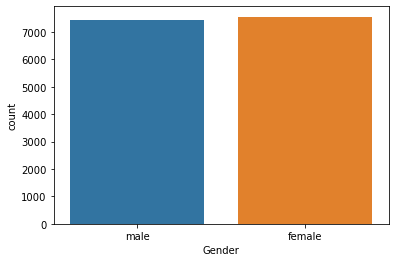

In [10]:
#plotting count plot to find the distribution between males and females

sns.countplot(calories_data['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

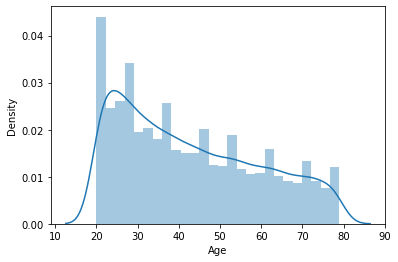

In [11]:
#find the distribution of age column

sns.distplot(calories_data["Age"])

<AxesSubplot:xlabel='Height', ylabel='Density'>

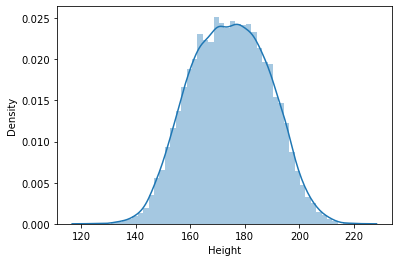

In [12]:
#find the distribution of height column

sns.distplot(calories_data["Height"])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

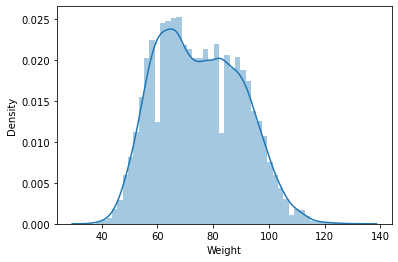

In [13]:
#find the distribution of weight column

sns.distplot(calories_data["Weight"])

<AxesSubplot:xlabel='Duration', ylabel='Count'>

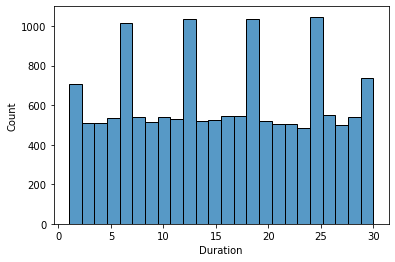

In [15]:
#find the distribution of age column

sns.histplot(calories_data["Duration"])

In [16]:
#find the correlation in the data set
#positive correlation -- if two column is directly proportional to each other meaning if change in one column affect the other in positive then it is postive correlation
#negetive correlation -- if two column is directly proportional to each other but here the change in one columns affects the other in negetive then it is negetive correlation

correlation = calories_data.corr()

<AxesSubplot:>

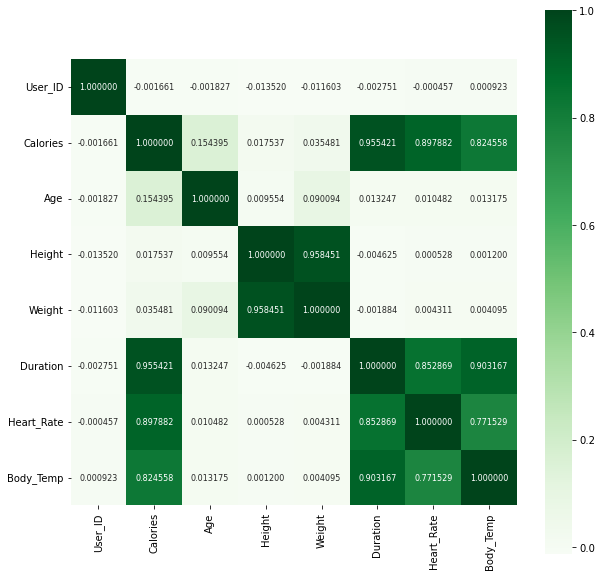

In [18]:
#visualize the correlation value by heatmap to understand correlation
plt.figure(figsize =(10,10))
sns.heatmap(correlation, cbar =True ,square=True ,fmt = '1f' ,annot = True ,annot_kws = {'size':8},cmap = 'Greens')

In [30]:
#converting text data data to numerical data 
calories_data.replace({'Gender':{'male':0,'female':1}},inplace = True)

In [31]:
calories_data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


In [32]:
#taking division
x = calories_data.drop(columns = ['User_ID','Calories'],axis = 1)
y = calories_data['Calories']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.2,train_size = 0.8,random_state = 2)

In [34]:
model = RandomForestRegressor()

In [35]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
model_pred = model.predict(x_test)
model_pred

array([127.45, 223.51,  36.57, ..., 145.94,  23.65,  89.18])

In [37]:
MAE = metrics.mean_absolute_error(y_test,model_pred)

In [38]:
print(f'Mean Absolute Error:',{MAE})

Mean Absolute Error: {1.675513333333333}


In [39]:
MSE = metrics.mean_squared_error(y_test,model_pred)
print(f'Mean Squared Error:',{MSE})

Mean Squared Error: {7.028496466666666}


In [40]:
rmse = np.sqrt(MSE)
RMSE = print(f'Root Mean Squared Error:',{rmse})

Root Mean Squared Error: {2.6511311673824562}


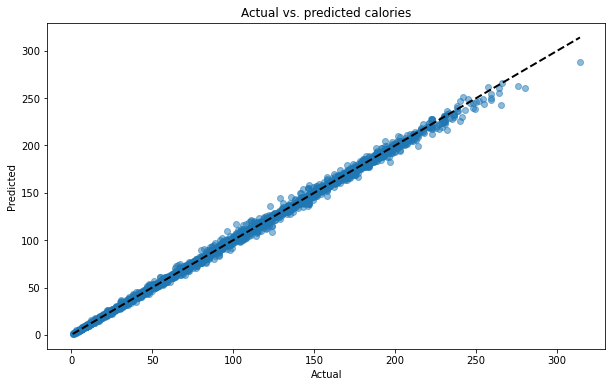

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. predicted calories')
plt.show()